In [42]:
# dependencies
import nltk
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [17]:
#Getting the excel data
file_path='predata.csv'
df = pd.read_csv(file_path)
# Set display options
pd.set_option('display.max_colwidth', None)
display(df)

,Timestamp,What is your age?,What is your profession?,How frequently do you use web applications in your daily work?,How comfortable are you with using new technology?,Have you used any customer interaction training tools or applications before?,"If you answered yes to the previous question, please briefly describe your experience with them? (If you answered no, please write n/a)","Based on what you know so far, what are your expectations for this application?","Based on your first impressions, what do you think is the purpose of this application?","Based on your first impressions, do you find the colours and asthetics of the app appealing ?","Which element(s) of the app if any, do you find unappleaing in this first impression?","On a scale of 1 to 10, how would you rate your current mood?","Are there any factors (e.g., tiredness, stress) that might affect your interaction with the application today? If so, what are the factors?"
0,2/22/2024 15:26:53,18-25,Education/Student,3,4,No,NaN,To ask and receive questions,To receive help with technology,No,"In my opinion, it looks like a scene from Grand Theft Auto.",8,Tired
1,2/22/2024 15:59:31,38-55,Healthcare,5,2,Yes,use it in everyday life for example online banking,that it will be fairly simple to follow,looks like customer service at Walmart,Yes,The colour is dull....brown?,7,Oh yes. I find technology to sometimes be tedious.
2,2/23/2024 0:26:24,18-25,Education/Student,5,5,No,N/a,Application seems to be easy to use,Looks like a training application for employees,Yes,NaN,10,I dont think there are any factors
3,2/24/2024 14:53:07,18-25,Information Technology,5,5,No,n'a,The design is not neat,i have no idea,No,The text on the right,7,no
4,2/24/2024 15:20:36,18-25,Recruitment,3,5,No,NaN,To answer questions,To answer questions for the animated person,Yes,text,5,no
5,2/24/2024 15:25:11,18-25,Education/Student,1,2,No,NaN,i'm supposed to type some text,i don't know,No,There is no alignment among the text,9,no
6,2/26/2024 13:45:26,38-55,Information Technology,5,5,Yes,NaN,To help new customer employee to become better at customer service.,Customer service training for new employees,Yes,none,8,no
7,2/27/2024 1:12:36,18-25,Information Technology,5,5,No,NaN,The application looks good but lacks a good color theme,This looks like customer interaction/employee training application,No,The right side of the page where the instructions and the user input area are,5,NaN
8,2/27/2024 11:47:35,25-38,Information Technology,5,4,No,NaN,Looks like a virtual support agent with an animated avatar.,To provide help and support to a customer,Yes,The boxes on the right hand side look like ads,7,Tired
9,2/27/2024 21:26:29,18-25,Sales,3,4,No,NaN,Seems like a conversation app,No idea,No,The color scheme is all over the place and text boxes aren't consistent,7,Tiredness


In [26]:
# finding the age range
# Define a function to calculate the midpoint of a range string
def calculate_midpoint(range_str):
    start, end = map(int, range_str.split('-'))
    return (start + end) / 2

# Apply the function to each row in the 'What is your age?' column to calculate midpoints
df['Midpoint'] = df['What is your age?'].apply(calculate_midpoint)

# Now you can calculate the median of the 'Midpoint' column
median_age = df['Midpoint'].median()

print("The Median Age of the survey:", median_age)

The Median Age of the survey: 21.5


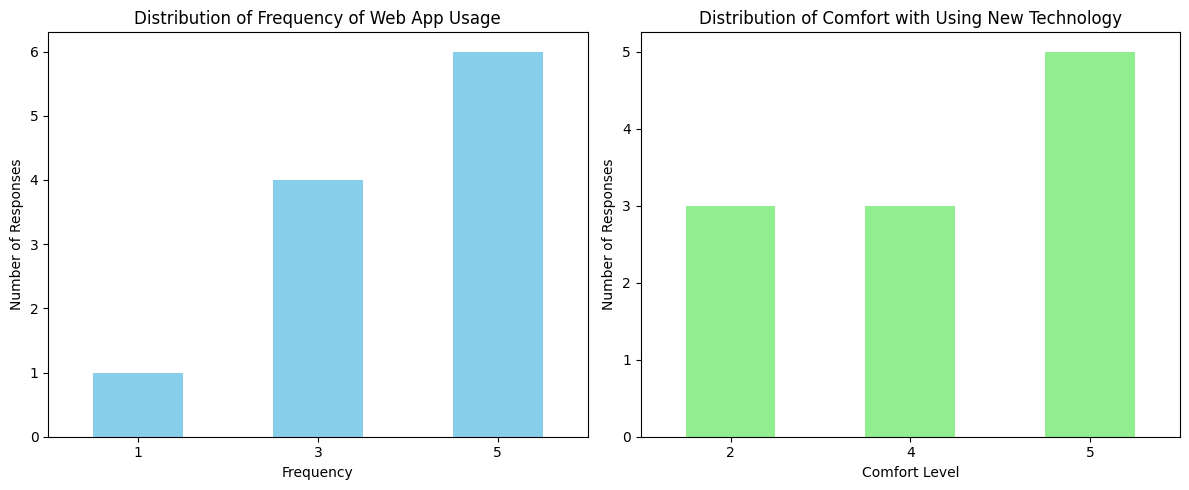

In [28]:
# Group by frequency and count responses
frequency_counts = df.groupby("How frequently do you use web applications in your daily work?").size()
comfort_counts = df.groupby("How comfortable are you with using new technology?").size()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
frequency_counts.plot(kind="bar", color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Frequency of Web App Usage")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Number of Responses")
axes[0].tick_params(axis='x', rotation=0)

# Plot for Comfort with Using New Technology
comfort_counts.plot(kind="bar", color="lightgreen", ax=axes[1])
axes[1].set_title("Distribution of Comfort with Using New Technology")
axes[1].set_xlabel("Comfort Level")
axes[1].set_ylabel("Number of Responses")
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /Users/davin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/davin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


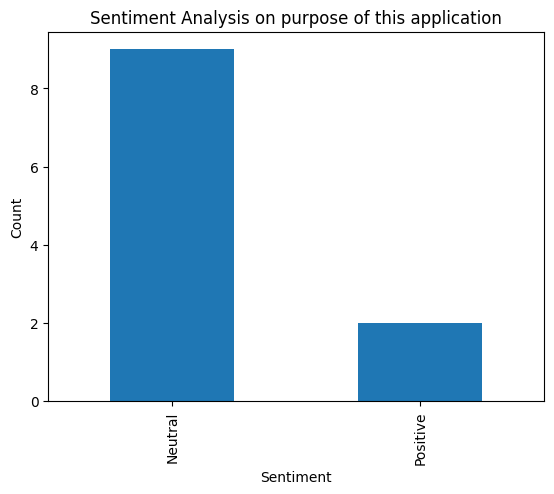

In [34]:
# Perform sentiment analysis on the user expectations 
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(filtered_tokens)

df['clean_text'] = df['Based on your first impressions, what do you think is the purpose of this application?'].apply(preprocess_text)

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['Based on your first impressions, what do you think is the purpose of this application?'].apply(analyze_sentiment)
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Analysis on purpose of this application')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


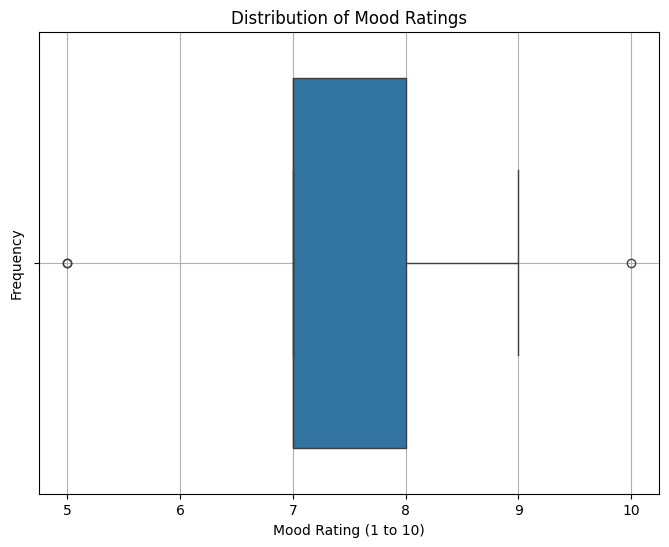

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="On a scale of 1 to 10, how would you rate your current mood?")
plt.title("Distribution of Mood Ratings")
plt.xlabel("Mood Rating (1 to 10)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [47]:
# now we are exporting the data from post questionaire 
file_path='postdata.csv'
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(file_path)
display(df)

,Timestamp,"Based on your experience, how easy was it to navigate through the website?",Were there any points where you felt lost or unsure where to go next?,"Were the interface elements (buttons, menus, icons, etc) clear and understandable?","What element(s) of the website(if any), did you find difficult to understand?",How would you rate the visual design and overall aesthetic of the app?,"Were there any aspects of the design that were particularly appealing, if so what were they?","Were there any aspects of the design that were particularly displeasing, if so what were they?",Were you able to accomplish the task you wanted to with the app?,"If you answered no to the previous question, what hindered your ability to ccomplish your task with the app? (If answered yes, please write n/a)",Did you face difficulties using any features of the app?,"If you answered yes to the previous question, can you describe the nature of these difficulties? (If answered no, please write n/a)",Unnamed: 12,"Regarding error messages in the app, how helpful were these in helping you resolve your issue?","Overall, how satisfied were you with the usibility of the app?","What features(if any ), made this app stand-out from similar apps in this category?",Would you suggest any changes or improvements to enhance the user experience?
0,2/22/2024 15:49:10,2,yes,2,All of it.,1,it was in colour.,The avatars hand would go through it's own leg when moving around. The text not legible when trying to read the options for what to choose when helping a customer.,No,The text not being legible.,Yes,Not knowing what to do next.,NaN,1.0,1,NaN,"yes, to make it more legible and clear on the instructions and what to do next."
1,2/22/2024 16:20:50,3,Yes,3,The directions were not fully clear and I required further explanation.,3,The interaction was entertaining.,Not fully clear in the explanation of what they wanted you to do.,Yes,NaN,Yes,They requested feedback however there was no button labeled feedback.,NaN,1.0,3,It was satisfactory,Yes
2,2/24/2024 14:04:01,2,yes,2,Everything was unclear,2,The animated person makes it more appealing.,Too much text on the right side.,Yes,NaN,Yes,i can't record to speak,NaN,NaN,2,The interaction with animated person makes it more appealing,less text
3,2/24/2024 14:18:45,3,yes,2,the instructions are confusing,2,no,"instructions, language",Yes,NaN,Yes,I don't know what i should do,NaN,1.0,3,NaN,"yes, should tell what user need to do next"
4,2/24/2024 15:30:47,2,yes,3,no,3,i don't find anything appealing,i don't get why we need to record our voice,Yes,NaN,Yes,i have no idea when to do what,NaN,2.0,2,no,change the interface to be more appealing
5,2/26/2024 14:08:48,3,yes,2,no clear instructions of what to do next,3,the animated people were fun.,none,Yes,NaN,No,NaN,NaN,3.0,2,none,Giving detailed but short instructions on how to proceed with each step
6,2/27/2024 1:18:11,3,"Not really, as there wasn’t enough there. Although, a good Color theme would have made it easier to navigate",3,Basically the whole right side,1,NaN,This application should not go into production as it needs a whole revamp. Good applications nowadays follow a minimalist design and dark\nmode which this app could use.,Yes,NaN,No,NaN,NaN,2.0,2,NaN,Yes I have mentioned it in a previous part of this form
7,2/27/2024 12:04:21,3,"The tutorial buttons to advance and go back did not stand out enough. When the rest of the UI was disabled, it wasn't indicated very well. I had to restart the second scenario and it wasn't clear how to do so.",3,"Switching between multiple choice and text input modes was a bit confusing.\nThe ""additional feedback"" popping up on the left and then back into the right felt awkward.\nOften times the text got small/cramped.",3,The color scheme seemed professional.,"The layout of the buttons overall felt awkward, and the text got too small to read at some points.",Yes,NaN,Yes,Figuring out how to advance the tutorial,NaN,3.0,3,I don't know any similar apps,"

In [49]:
# Summary statistics
total_responses = len(df)
average_usability_rating = df['Based on your experience, how easy was it to navigate through the website?'].mean()

# Count the number of responses for each rating category
rating_counts = df['Based on your experience, how easy was it to navigate through the website?'].value_counts()

# Calculate the percentage of responses for each rating category
rating_percentages = (rating_counts / total_responses) * 100

# Filter out non-numeric columns for calculating average ratings
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the average rating for each aspect of the app
average_ratings = df[numeric_columns].mean()

# Print the summary statistics
print("Total responses:", total_responses)
print("Average usability rating:", average_usability_rating)
print("\nRating counts:")
print(rating_counts)
print("\nRating percentages:")
print(rating_percentages)
print("\nAverage ratings for each aspect:")
print(average_ratings)

Total responses: 10
Average usability rating: 2.7

Rating counts:
Based on your experience, how easy was it to navigate through the website?
3    5
2    4
4    1
Name: count, dtype: int64

Rating percentages:
Based on your experience, how easy was it to navigate through the website?
3    50.0
2    40.0
4    10.0
Name: count, dtype: float64

Average ratings for each aspect:
Based on your experience, how easy was it to navigate through the website?                        2.700000
Were the interface elements (buttons, menus, icons, etc) clear and understandable?                2.500000
How would you rate the visual design and overall aesthetic of the app?                            2.600000
Unnamed: 12                                                                                            NaN
Regarding error messages in the app, how helpful were these in helping you resolve your issue?    2.111111
Overall, how satisfied were you with the usibility of the app?                           

Average Rating: 2.7


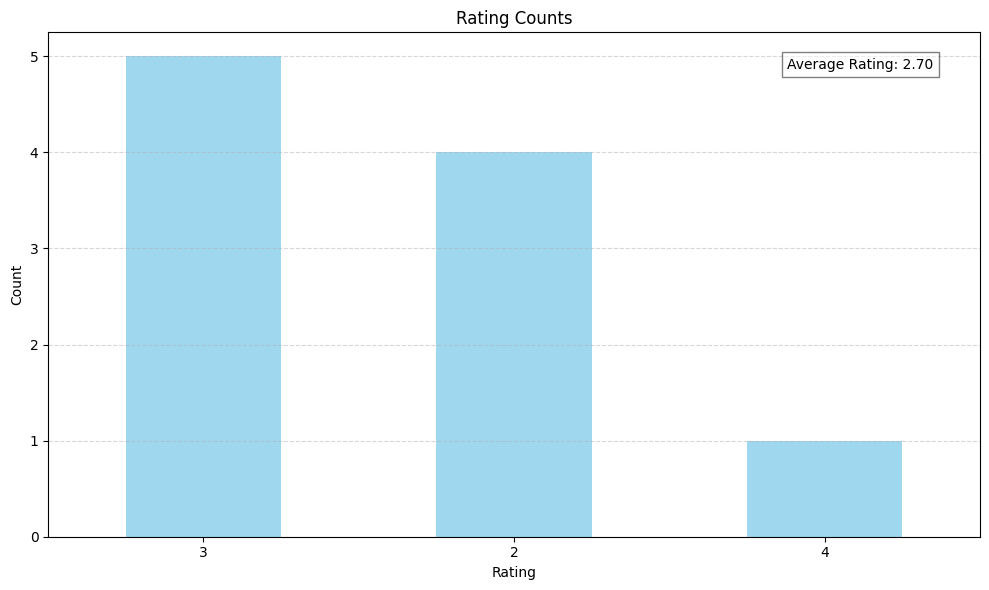

In [62]:
# Calculate total count and sum of ratings
total_count = rating_counts.sum()
sum_of_ratings = (rating_counts.index * rating_counts).sum()

# Calculate average rating
average_rating = sum_of_ratings / total_count

print("Average Rating:", average_rating)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add text for the average rating
plt.text(0.95, 0.95, f'Average Rating: {average_rating:.2f}',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


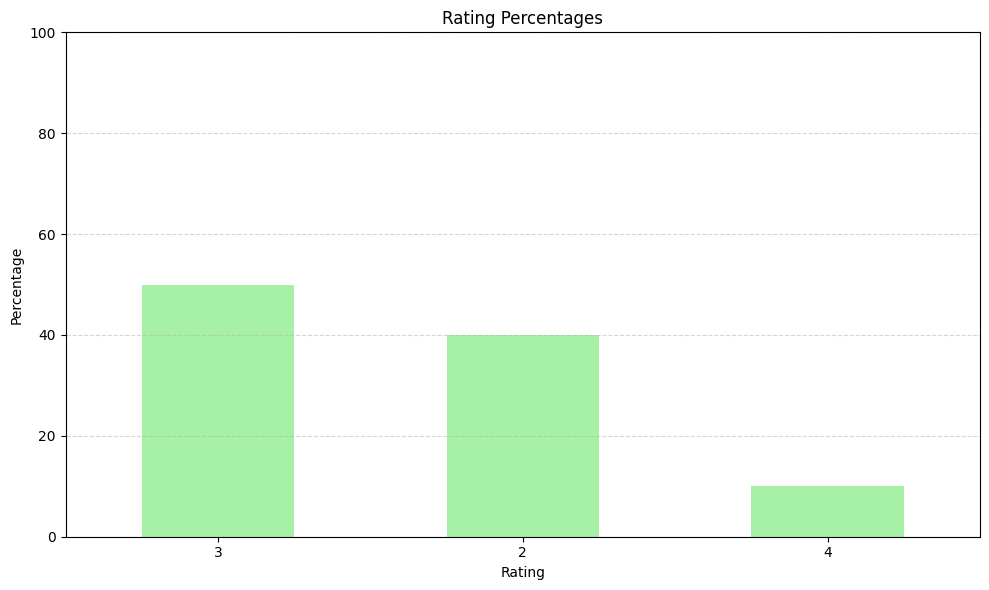

In [53]:
# Create a bar plot for rating percentages
plt.figure(figsize=(10, 6))
rating_percentages.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.title('Rating Percentages')
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

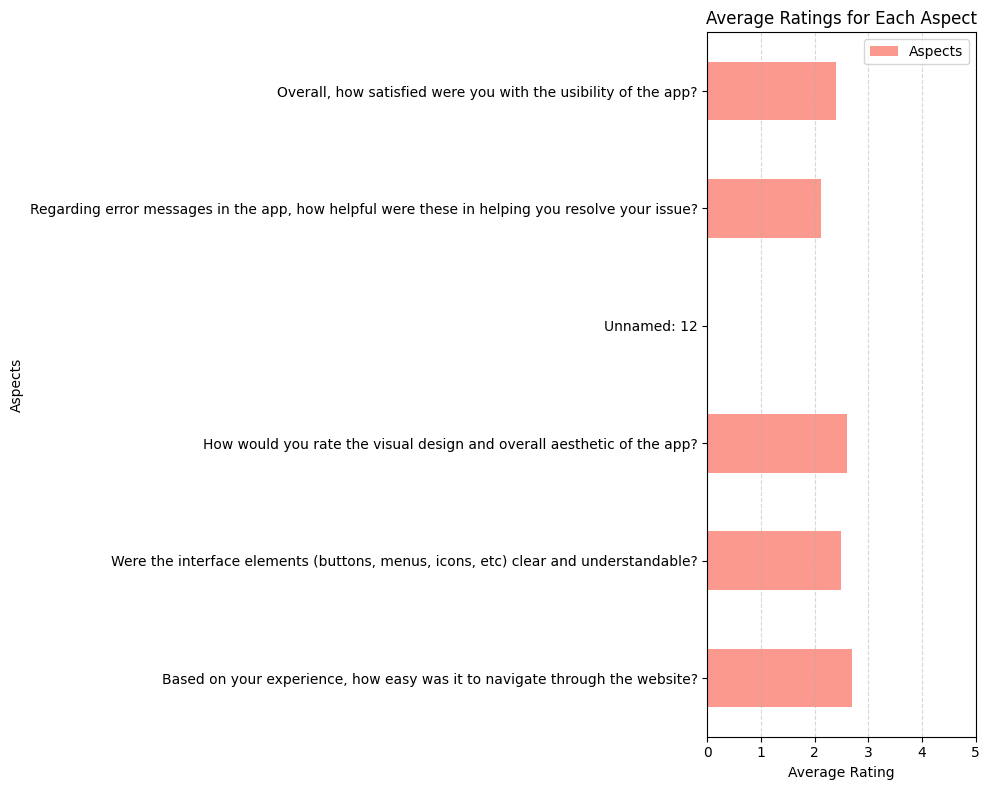

In [61]:
# Create a bar plot for average ratings with mapped labels
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
average_ratings_mapped.plot(kind='barh', color='salmon', alpha=0.8)  # Use barh for horizontal plot
plt.title('Average Ratings for Each Aspect')
plt.xlabel('Average Rating')
plt.ylabel('Aspects')
plt.xlim(0, 5)  # Adjust limit
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Grid along x-axis

# Create a legend
plt.legend(['Aspects'], loc='upper right')

plt.tight_layout()
plt.show()


